Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [3]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv(r'C:\Users\young\Desktop\.ipynb_checkpoints\Mall_Customers.csv')

In [17]:
df = customer_data 

In [4]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [6]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income Column & Spending Score column

In [8]:
X = customer_data.iloc[:,[3,4]].values

In [9]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [10]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

C:\Users\young\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


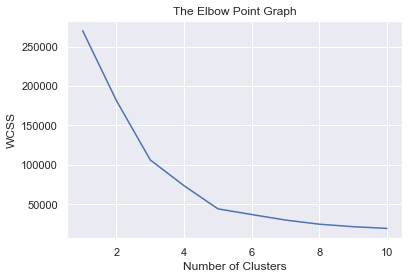

In [11]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters

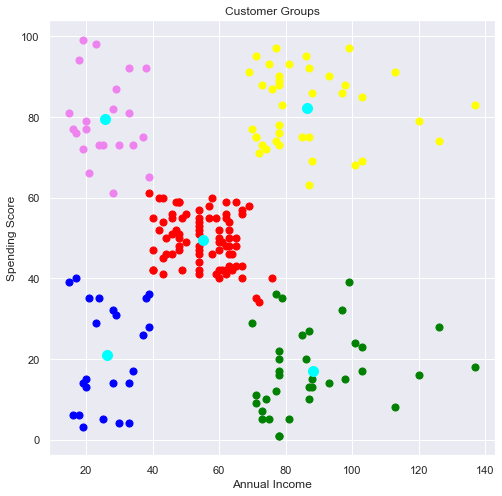

In [13]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Performing PCA

In [37]:
#Standardising the numerical attribute
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [38]:
cluster_cols = ['Annual Income (k$)','Spending Score (1-100)']

In [39]:
columns_to_scale = ['Age','Annual Income (k$)','Spending Score (1-100)']
data_scaled=df.copy()

In [40]:
data_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [41]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(data_scaled[cluster_cols])

data_scaled['Clusters_4'] = model.predict(data_scaled[cluster_cols])

In [42]:
data_scaled

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters_4
0,1,Male,-1.424569,-1.738999,-0.434801,0
1,2,Male,-1.281035,-1.738999,1.195704,3
2,3,Female,-1.352802,-1.700830,-1.715913,0
3,4,Female,-1.137502,-1.700830,1.040418,3
4,5,Female,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...,...,...
195,196,Female,-0.276302,2.268791,1.118061,1
196,197,Female,0.441365,2.497807,-0.861839,2
197,198,Male,-0.491602,2.497807,0.923953,1
198,199,Male,-0.491602,2.917671,-1.250054,2


### Applying PCA

In [49]:
from sklearn import decomposition

pca=decomposition.PCA()

pca_res=pca.fit_transform(data_scaled[cluster_cols])

data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

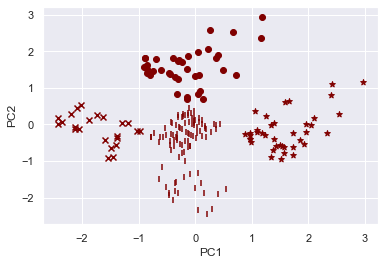

In [50]:
markers = ['x', '*', 'o','|']

for clust in range(4):
    temp = data_scaled[data_scaled.Clusters_4 == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], \
                label="Cluster "+str(clust), \
                color='maroon')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [51]:
data_scaled

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters_4,pc1,pc2
0,1,Male,-1.424569,-1.738999,-0.434801,0,-1.537109,-0.922207
1,2,Male,-1.281035,-1.738999,1.195704,3,-0.384168,-2.075149
2,3,Female,-1.352802,-1.700830,-1.715913,0,-2.416002,0.010665
3,4,Female,-1.137502,-1.700830,1.040418,3,-0.466982,-1.938355
4,5,Female,-0.563369,-1.662660,-0.395980,0,-1.455678,-0.895678
...,...,...,...,...,...,...,...,...
195,196,Female,-0.276302,2.268791,1.118061,1,2.394866,0.813689
196,197,Female,0.441365,2.497807,-0.861839,2,1.156805,2.375629
197,198,Male,-0.491602,2.497807,0.923953,1,2.419550,1.112883
198,199,Male,-0.491602,2.917671,-1.250054,2,1.179183,2.947027


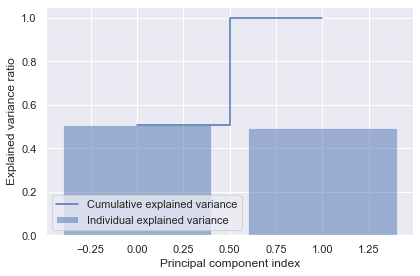

In [55]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [52]:
df['Clusters_4']=data_scaled.Clusters_4
df.groupby('Clusters_4')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Clusters_4,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,40.394737,87.000000,18.631579
3,39.200000,48.260000,56.480000


One way to describe the clusters is as follows: 

Cluster 0: Middle-aged penny pinchers (high income, low spend)

Cluster 1: Young high rollers (younger age, high income, high spend)

Cluster 2: Young aspirers (low income, high spend)

Cluster 3: Old average Joes (average income, average spend

### Observation

We have used the Mall Customer segmentation dataset from kaggle - https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download

We have applied the K-means algorithm on the dataset after checking on the data which was already clean

Performed dimension reduction using PCA and plotted the explained variance ratio 

As we can see that we have chose 5 number of clusters based on the optimum number of clusters using wcss method where we used Elbow method to find k = 5